In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords



In [28]:
# Sample code to load the tweets file from a folder
folder_name = "CrisisLexT26-v1.0/CrisisLexT26/2012_Guatemala_earthquake"
df = pd.read_csv(f"{folder_name}/2012_Guatemala_earthquake-tweets_labeled.csv")


In [32]:
# Select only tweets that are related and informative
df_filtered = df[df[' Informativeness'] == 'Related and informative']

# Take the 'Tweet Text' column for topic modeling
text_data = df_filtered[' Tweet Text'].values


Index(['Tweet ID', ' Tweet Text', ' Information Source', ' Information Type',
       ' Informativeness'],
      dtype='object')


In [33]:
# Initialize CountVectorizer
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(min_df=5, stop_words=stop_words)

# Fit and transform the text data
text_vectorized = vectorizer.fit_transform(text_data)


In [36]:
# Initialize LDA model with N topics
N = 1  # You can change this to any number of topics you wish to identify
lda = LatentDirichletAllocation(n_components=N, random_state=42)

# Fit LDA model to the vectorized text data
lda.fit(text_vectorized)


LatentDirichletAllocation(n_components=1, random_state=42)

In [37]:
# Extract the words associated with each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #1
guatemala de http co rt en sismo el earthquake terremoto


In [49]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Specify the main folder containing all event sub-folders
main_folder = "CrisisLexT26-v1.0\CrisisLexT26"

ignored_files_or_folders = ["README.md", ".DS_Store"]

# Loop through each sub-folder in the main folder
for event_folder in os.listdir(main_folder):
    
    if event_folder in ignored_files_or_folders:
        continue
    
    # Define the path to the JSON file in the sub-folder
    json_file_path = os.path.join(main_folder, event_folder, f"{event_folder}-event_description.json")
    # Load the JSON file
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    
    # Extract keywords which will serve as topics
    topics = data.get("keywords", [])
    
    # Loop through each keyword and add edges to the graph
    for i, term1 in enumerate(topics):
        for j, term2 in enumerate(topics):
            if i < j:  # Avoid self-loops and repeated edges
                if G.has_edge(term1, term2):
                    # Increase weight by 1 if edge already exists
                    G[term1][term2]['weight'] += 1
                else:
                    # Create new edge with weight 1 and folder (event) attribute
                    G.add_edge(term1, term2, weight=1, folder=event_folder)



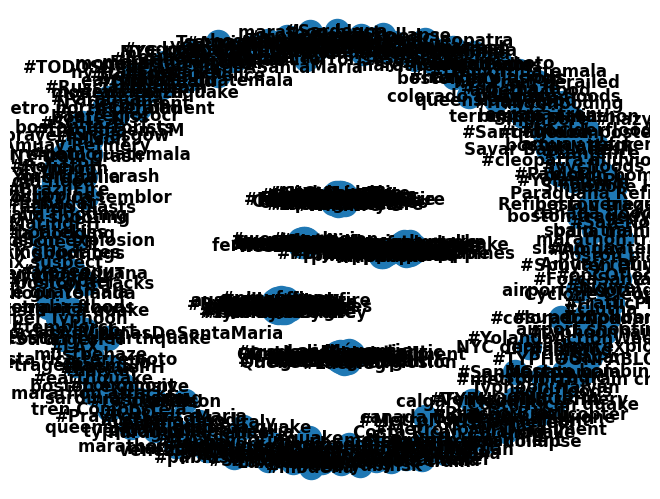

In [53]:
# Optionally, remove edges with weight below a certain threshold, e.g., 1
for u, v, d in list(G.edges(data=True)):
    if d['weight'] <= 1:
        G.remove_edge(u, v)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
import random


# Generate a list of unique folders from the graph edges (replace this list with your actual data)
unique_folders = {d['folder'] for u, v, d in G.edges(data=True)}

# Generate random colors for each unique folder
folder_to_color = {folder: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for folder in unique_folders}

# Assign colors to edges based on their folder attribute
edge_colors = [folder_to_color.get(d['folder'], 'black') for u, v, d in G.edges(data=True)]

# Draw the graph
nx.draw(G, pos, with_labels=True, font_weight='bold', edge_color=edge_colors)




In [64]:
import os
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Loop through each folder
root_folder = 'CrisisLexT26-v1.0\CrisisLexT26'
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)

    # Continue only if it's a folder
    if not os.path.isdir(folder_path):
        continue

    # Read JSON file for keywords
    json_file_path = os.path.join(folder_path, f"{folder_name}-event_description.json")
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    topics = data.get("keywords", [])

    # Read CSV file for tweets (assuming the CSV file is named 'tweets.csv')
    csv_file_path = os.path.join(folder_path, f"{folder_name}-tweets_labeled.csv")
    df = pd.read_csv(csv_file_path)

    # Pre-processing: filter the dataframe to only include relevant tweets
    text_data = df[' Tweet Text'].values
    df_filtered = df[df[' Informativeness'] == 'Related and informative']

    # Initialize CountVectorizer
    stop_words = stopwords.words('english')
    vectorizer = CountVectorizer(min_df=5, stop_words=stop_words)

    # Fit and transform the text data
    text_vectorized = vectorizer.fit_transform(text_data)

    # Apply LDA
    lda = LatentDirichletAllocation(n_components=5, random_state=0)
    lda.fit(text_vectorized)

    # Output the topics (Replace this with your own visualization or analysis)
    print(f"Topics for {folder_name}")
    for idx, topic in enumerate(lda.components_):
        print(f"Topic #{idx+1}")
        try:
            # For scikit-learn versions 0.24 and above
            print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
        except AttributeError:
            # For scikit-learn versions prior to 0.24
            print(" ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]))



Topics for 2012_Colorado_wildfires
Topic #1
colorado co http springs rt fire wildfires canyon waldo waldocanyonfire
Topic #2
rt highparkfire please colorado pray fire safe acres wild help
Topic #3
rt highparkfire boulder flagstafffire smoke fire one cofire gt 9news
Topic #4
colorado fires rt wildfires springs fire rain prayers thoughts amp
Topic #5
co http colorado wildfire rt fire springs homes wildfires via
Topics for 2012_Costa_Rica_earthquake
Topic #1
de en rt costarica el http costa terremoto rica co
Topic #2
earthquake co http 2012 09 rt september 12 california usgs
Topic #3
tsunami rt warning quake costa caribbean watch effect mexico jishin
Topic #4
earthquake costa rica http co magnitude rt quake hits coast
Topic #5
de terremoto http costa rica en rt tsunami co alerta
Topics for 2012_Guatemala_earthquake
Topic #1
co http guatemala earthquake champerico rt nov epicenter ago newearthquake
Topic #2
sismo de rt http magnitud co guatemala km alerta sacude
Topic #3
guatemala earthqua

KeyboardInterrupt: 

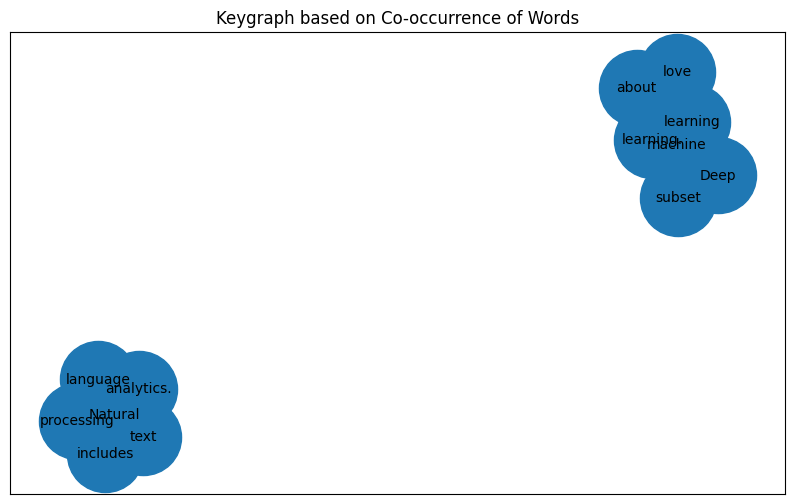

In [1]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Sample sentences
sentences = [
    "I love learning about machine learning.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing includes text analytics."
]

def extract_keywords(text):
    # Simple keyword extraction based on words length, you can replace this with more sophisticated methods
    return [word for word in text.split() if len(word) > 3]

def co_occurrence(sentences):
    co_occurrence_graph = nx.Graph()

    for sentence in sentences:
        keywords = extract_keywords(sentence)
        
        # For each pair of keywords, add an edge to the graph
        for pair in itertools.combinations(keywords, 2):
            if co_occurrence_graph.has_edge(pair[0], pair[1]):
                co_occurrence_graph[pair[0]][pair[1]]['weight'] += 1
            else:
                co_occurrence_graph.add_edge(pair[0], pair[1], weight=1)
                
    return co_occurrence_graph

graph = co_occurrence(sentences)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_size=3000)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Keygraph based on Co-occurrence of Words")
plt.show()
